# Assignment 1: Visualization Design

https://courses.cs.washington.edu/courses/cse512/24sp/a1.html

https://observablehq.com/@uwdata/hours-of-sunshine

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sunshine_df = pd.read_csv('sunshine.csv')

In [3]:
sunshine_gdf = gpd.GeoDataFrame(sunshine_df,geometry=gpd.points_from_xy(sunshine_df.lon,sunshine_df.lat),crs='EPSG:4326')

In [4]:
sunshine_gdf

,city,lon,lat,month,monthnum,sunshine,geometry
0,Chicago,-87.623177,41.881832,Jan,0,135,POINT (-87.62318 41.88183)
1,Chicago,-87.623177,41.881832,Feb,1,136,POINT (-87.62318 41.88183)
2,Chicago,-87.623177,41.881832,Mar,2,187,POINT (-87.62318 41.88183)
3,Chicago,-87.623177,41.881832,Apr,3,215,POINT (-87.62318 41.88183)
4,Chicago,-87.623177,41.881832,May,4,281,POINT (-87.62318 41.88183)
...,...,...,...,...,...,...,...
67,Seattle,-122.335167,47.608013,Aug,7,281,POINT (-122.33517 47.60801)
68,Seattle,-122.335167,47.608013,Sep,8,221,POINT (-122.33517 47.60801)
69,Seattle,-122.335167,47.608013,Oct,9,142,POINT (-122.33517 47.60801)
70,Seattle,-122.335167,47.608013,Nov,10,72,POINT (-122.33517 47.60801)


Text(116.97222222222221, 0.5, 'Latitude')

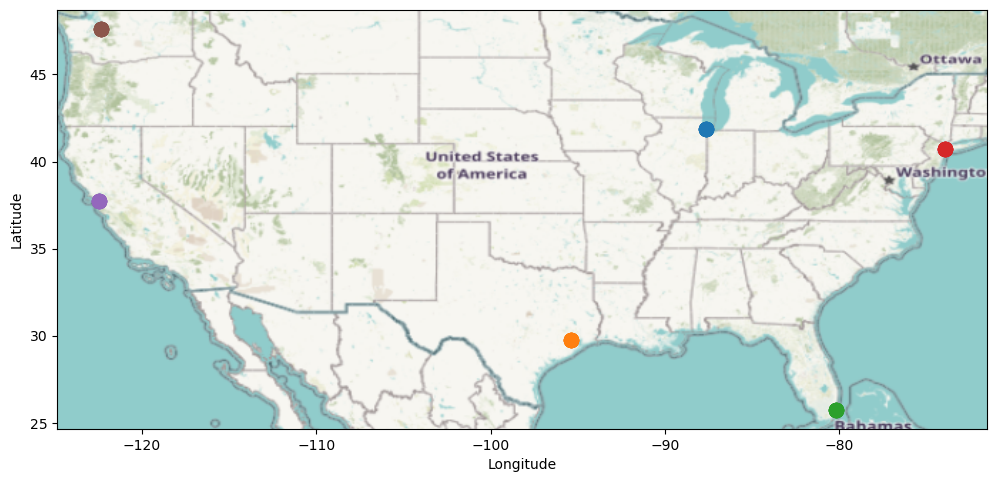

In [5]:
f,ax=plt.subplots(figsize=(12,15))
for city in np.unique(sunshine_gdf.city):
    sunshine_gdf[sunshine_gdf.city==city].plot(ax=ax,markersize=100)

ctx.add_basemap(ax, crs=sunshine_gdf.crs,attribution=False)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


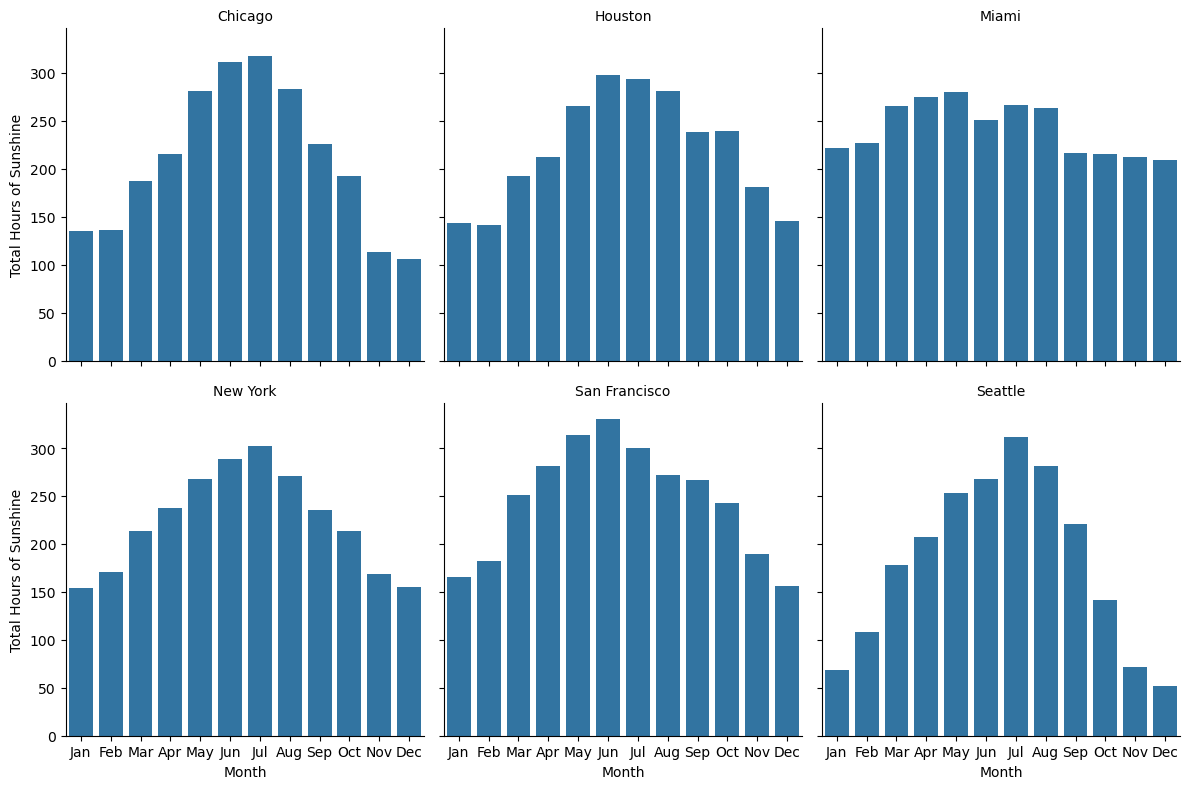

In [6]:
g = sns.FacetGrid(sunshine_df, col='city', col_wrap=3, height=4)
g.map(sns.barplot, 'month', 'sunshine', errorbar=None)

g.set_axis_labels('Month', 'Total Hours of Sunshine')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

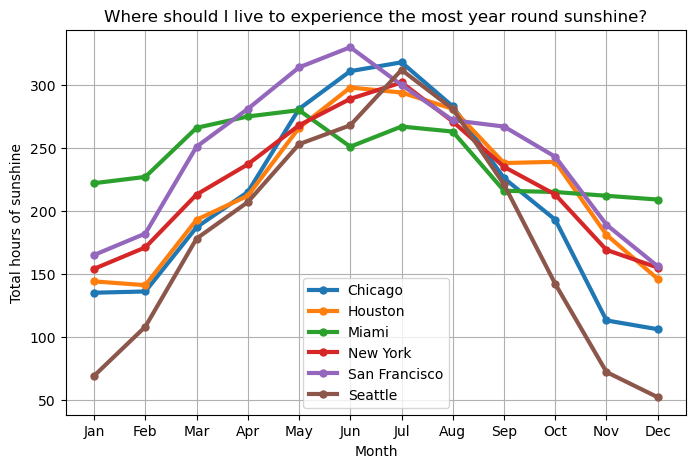

In [7]:
f,ax=plt.subplots(figsize=(8,5))

for city, city_data in sunshine_df.groupby('city'):
    #plt.figure(figsize=(5,5))
    #plt.bar(city_data['month'],city_data['sunshine'])
    ax.plot(city_data['month'],city_data['sunshine'],linewidth=3,marker='.',markersize=10,label=f'{city}')
    #plt.xlabel('month')
    #plt.ylabel('total hours of sunshine')
    #plt.title(f'Hours of sunshine in {city}')
plt.xlabel('Month')
plt.ylabel('Total hours of sunshine')
plt.title('Where should I live to experience the most year round sunshine?')
plt.grid()
plt.legend()